In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Return Forecasting: Read Historical Daily Yen Futures Data
In this notebook, you will load historical Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [5]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [6]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0
...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:xlabel='Date'>

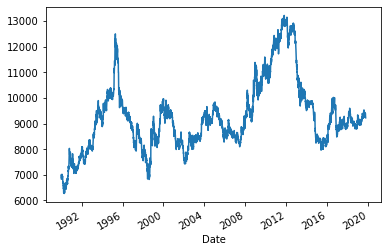

In [7]:
# Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE!
# Call the data frame "yen_futures" and select the column "Settle" and plot using the matplotlib library.

yen_futures.Settle.plot()

# There is a long term rise around 1991 to 1995 and 2008 to 2016. The short term rise and falls of prices are 

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [10]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
# YOUR CODE HERE!

# Decomposing the yen_futures times series into a noise and a trend series.
ts_noise, ts_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])

In [15]:
yen_futures['Trend'] = ts_trend
yen_futures['Noise'] = ts_noise

yen_futures.loc["1990-01-01":, :] # selecting dates starting from 1990

yen_futures

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Trend,Noise
Date,,,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0,6908.503967,-61.503967
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0,6908.799756,-21.799756
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0,6909.057104,98.942896
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0,6909.223948,40.776052
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0,6909.310062,49.689938
...,...,...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,9313.060753,24.939247
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,9309.368559,-5.868559
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,9305.454594,-54.454594


In [16]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
# Creating a dataframe called "yen_futures_filtered" and concatenating the Settle column with the noise and trend columns.
yen_futures_filtered = pd.concat([yen_futures['Settle'], ts_trend, ts_noise], ignore_index=False, axis=1)

#Renaming the columns
yen_futures_filtered.columns = ['Settle', 'Trend', 'Noise']
yen_futures_filtered

,Settle,Trend,Noise
Date,,,
1990-01-02,6847.0,6908.503967,-61.503967
1990-01-03,6887.0,6908.799756,-21.799756
1990-01-04,7008.0,6909.057104,98.942896
1990-01-05,6950.0,6909.223948,40.776052
1990-01-08,6959.0,6909.310062,49.689938
...,...,...,...
2019-10-09,9338.0,9313.060753,24.939247
2019-10-10,9303.5,9309.368559,-5.868559
2019-10-11,9251.0,9305.454594,-54.454594


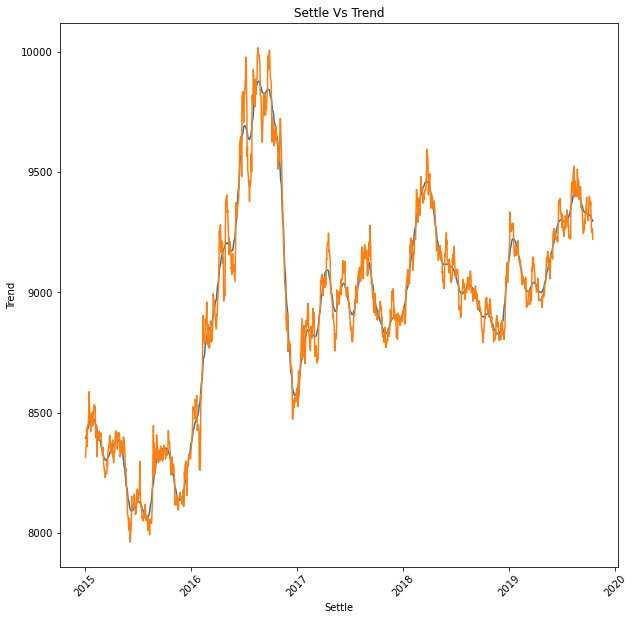

In [17]:
# Plot the Settle Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!

# Add pyplot to apply the examaple code
import matplotlib.pyplot as plt

#Provide a date range
yff_2015 = yen_futures_filtered['2015': '2020']

#Source: https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/

fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(yff_2015.index.values,
       yff_2015['Trend'],
       yff_2015['Settle'])

# Set title and labels for axes
ax.set(xlabel="Settle",
       ylabel="Trend",
       title="Settle Vs Trend")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

#The graph shows an upward trend from 2015 to 2020.


<AxesSubplot:title={'center':'Noise'}, xlabel='Date', ylabel='(Noise)'>

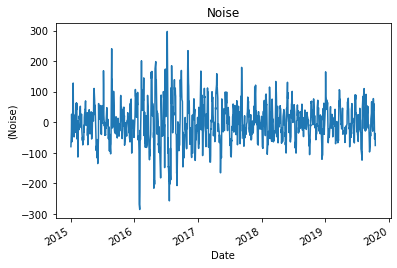

In [19]:
# Plot the Settle Noise
# YOUR CODE HERE!
#Noise from 2015 to 2020.Added a label and title.

yff_2015['Noise'].plot(ylabel="(Noise)", title="Noise")

---

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [20]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


C:\Users\Japes\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


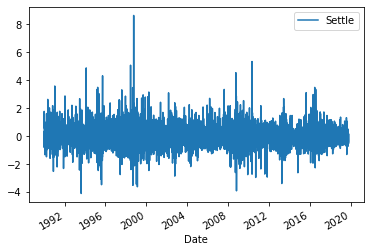

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!

returns.plot() #Visualize the daily returns
#Confirming that this a stationary series

# Creating the ARMA model, applying the return values and the order as instructed.
model = ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
#Fitting the model created to the data
results = model.fit()

In [22]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()

#The p values are between 0.422 and 0.921, this is not less than 0.05 so the model is not a good fit.

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Mon, 07 Dec 2020   AIC                          15798.142
Time:                        09:40:16   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.y       -0.3062      1.277     -0.240      0.811      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2946      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3352           +0.0000j            3.3352            0.5000
AR.2         -157.2096           +0.0000j          157.2096            0.5000
MA.1           -3.3941           +0.0000j            3.3941            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="5 Day Return Forecast", xlabel="Days", ylabel="(Returns)")

---

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [42]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
ARIMA_model = ARIMA(returns['Settle'], order=(5, 1, 1))

# Fit the model
# YOUR CODE HERE!
#Fitting the model created to the data
ARIMA_results = ARIMA_model.fit()

C:\Users\Japes\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Japes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

KeyboardInterrupt: 

In [40]:
# Output model summary results:
ARIMA_results.summary()

#The p values are between 0 and 0.977, it is not less than 0.05 so the model is not a good fit. There is a possibility that with a higher number of auto regression lags, the model might fit better.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7513
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -7894.803
Method:                       css-mle   S.D. of innovations              0.692
Date:                Mon, 07 Dec 2020   AIC                          15809.606
Time:                        10:35:03   BIC                          15878.850
Sample:                             1   HQIC                         15833.382
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.208e-06   3.54e-06     -0.906      0.365   -1.02e-05    3.73e-06
ar.L1.D.Settle    -0.0119      0.012     -1.034      0.301      -0.035       0.011
ar.L2.D.Settle    -0.0005      0.012     -0.048      0.962      -0.023       0.022
ar.L3.D.Settle    -0.0130      0.012     -1.125      0.260      -0.036       0.010
ar.L4.D.Settle    -0.0189      0.012     -1.642      0.101      -0.042       0.004
ar.L5.D.Settle    -0.0023      0.012     -0.196      0.845      -0.025       0.020
ar.L6.D.Settle    -0.0096      0.012     -0.830      0.407      -0.032       0.013
ar.L7.D.Settle     0.0108      0.012      0.934      0.350      -0.012       0.033
ma.L1.D.Settle    -1.0000      0.000  -2521.041      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5889           -0.8323j            1.7937           -0.4232
AR.2           -1.5889           +0.8323j            1.7937            0.4232
AR.3           -0.3533           -1.8807j            1.9135           -0.2796
AR.4           -0.3533           +1.8807j            1.9135            0.2796
AR.5            1.2727           -1.3843j            1.8804           -0.1317
AR.6            1.2727           +1.3843j            1.8804            0.1317
AR.7            2.2278           -0.0000j            2.2278           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Price Forecast'}, xlabel='Days', ylabel='(Settle Price)'>

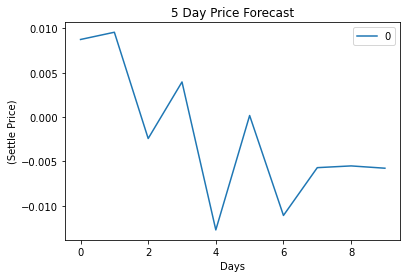

In [41]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(ARIMA_results.forecast(steps=10)[0]).plot(title="5 Day Price Forecast", xlabel="Days", ylabel="(Settle Price)")

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [29]:
from arch import arch_model

In [30]:
# Estimate a GARCH model:
# YOUR CODE HERE!
# Creating a GARCH model and using the order as instructed above.
model = arch_model(returns, vol="GARCH", p=2, q=1)

# Fit the model
# YOUR CODE HERE!
#Fitting the data to the model
GARCH_results = model.fit()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 58484.613563797655
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5797220.036559552
Iteration:      3,   Func. Count:     27,   Neg. LLF: 8256.988926112868
Iteration:      4,   Func. Count:     36,   Neg. LLF: 7487.825867982997
Iteration:      5,   Func. Count:     43,   Neg. LLF: 7505.407911647941
Iteration:      6,   Func. Count:     50,   Neg. LLF: 7479.18094811502
Iteration:      7,   Func. Count:     57,   Neg. LLF: 7894.273005543506
Iteration:      8,   Func. Count:     65,   Neg. LLF: 7462.393213339678
Iteration:      9,   Func. Count:     71,   Neg. LLF: 7462.164574572189
Iteration:     10,   Func. Count:     77,   Neg. LLF: 7462.000253187135
Iteration:     11,   Func. Count:     83,   Neg. LLF: 7461.92609814565
Iteration:     12,   Func. Count:     89,   Neg. LLF: 7461.919163785999
Iteration:     13,   Func. Count:     95,   Neg. LLF: 7461.919128442237
Iteration:     14,   Func. Count:    101,   Neg. LLF: 4243877562.

In [31]:
# Summarize the model results
# YOUR CODE HERE!
#Summarizing all of the model metrics and results
GARCH_results.summary()

#The p values are between 0 and 1, two values are less than 0.05 so the model is a good fit. However, this should be looked at again because R^2 = 0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Settle   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.92
Distribution:                  Normal   AIC:                           14933.8
Method:            Maximum Likelihood   BIC:                           14968.5
                                        No. Observations:                 7514
Date:                Mon, Dec 07 2020   Df Residuals:                     7509
Time:                        09:41:21   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.3898e-04  7.392e-03      0.127      0.899 [-1.355e-02,1.543e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2836e-03  2.054e-03      2.086  3.699e-02  [2.585e-04,8.309e-03]
alpha[1]       0.0380  1.285e-02      2.960  3.076e-03  [1.285e-02,6.324e-02]
alpha[2]   3.3435e-07  1.702e-02  1.965e-05      1.000 [-3.336e-02,3.336e-02]
beta[1]        0.9537  1.418e-02     67.251      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [32]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [33]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
#Using the GARCH model to forecast the yen returns.
forecasts = GARCH_results.forecast(start=last_day, horizon=forecast_horizon)
forecasts

In [34]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.435408,7.477021,7.518061,7.558541,7.598472


In [35]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.435408
h.2,7.477021
h.3,7.518061
h.4,7.558541
h.5,7.598472


<AxesSubplot:>

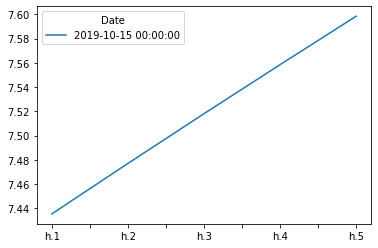

In [36]:
# Plot the final forecast
# YOUR CODE HERE!
#Plot the returns for the future
final.plot()

---

# Conclusions

Based on your time series analysis, would you buy the yen now?

Is the risk of the yen expected to increase or decrease?

Based on the model evaluation, would you feel confident in using these models for trading?

Based on the GARCH model returns, yes I would buy the Yen now. The Yen returns will increase every year. I am confident about the GARCH model, I would not feel confident using the ARMA and ARIMA models for trading.